In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

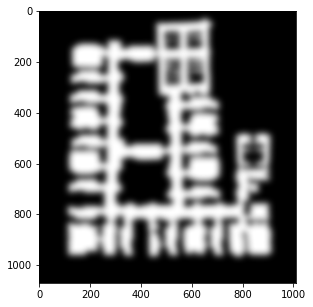

In [7]:
blurr_scaling = 85
img = cv.imread('diag_floor_b1.png', 0)
_, ref = cv.threshold(img, 240, 255, cv.THRESH_BINARY)
bl = cv.GaussianBlur(ref, (blurr_scaling, blurr_scaling), -1, 0)

plt.figure(figsize=(5,5))
plt.imshow(bl, cmap='gray', interpolation='bicubic')

sobelx = np.absolute(cv.Sobel(bl, cv.CV_16S, 1, 0, ksize=3))
sobely = np.absolute(cv.Sobel(bl, cv.CV_16S, 0, 1, ksize=3))

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.04651163  0.04651163  0.04651163  0.04651163  0.04651163  0.04651163
   0.04651163  0.04651163  0.04651163  0.04651163]
 [ 0.09302326  0.09302326  0.09302326  0.09302326  0.09302326  0.09302326
   0.09302326  0.09302326  0.09302326  0.09302326]
 [ 0.09302326  0.09302326  0.09302326  0.09302326  0.09302326  0.09302326
   0.09302326  0.09302326  0.09302326  0.09302326]
 [ 0.09302326  0.09302326  0.09302326  0.09302326  0.09302326  0.09302326
   0.09302326  0.09302326  0.09302326  0.09302326]
 [ 0.09302326  0.09302326  0.09302326  0.09302326  0.09302326  0.09302326
   0.09302326  0.09302326  0.09302326  0.09302326]
 [ 0.09302326  0.09302326  0.09302326  0.09302326  0.09302326  0.09302326
   0.09302326  0.09302326  0.09302326  0.09302326]
 [ 0.13953488  0

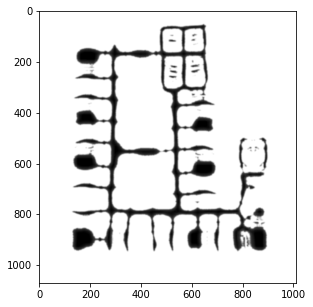

In [6]:
x_component, y_component = sobelx, sobely
potential = x_component + y_component
potential = potential/np.max(potential)
potential[(ref == 0) | (potential > 0.3)] = 1.0
            
plt.figure(figsize=(5,5))
plt.imshow(potential, cmap='gray', interpolation='bicubic')
print(potential[190:200, 190:200])

In [4]:
nodes = []
print(np.min(potential), np.max(potential))

for i in range(potential.shape[0]):
    for j in range(potential.shape[1]):
        if potential[i, j] < 0.0001:
            found = False
            for n in range(len(nodes)):
                if abs(np.sum(np.linalg.norm(nodes[n] - np.array([i, j])))) < 50: 
                    found = True
                    break
            if not found: 
                nodes.append([i, j])
                if len(nodes)%10 == 0: print("added #", len(nodes))
                    
nodes = np.array(nodes)
print(nodes.shape)

0.0 1.0
added # 10
added # 20
added # 30
added # 40
added # 50
added # 60
added # 70
added # 80
(82, 2)


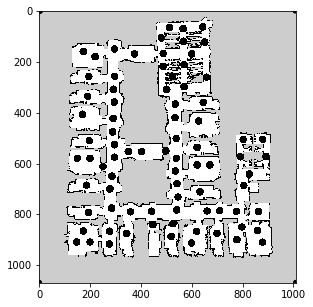

In [5]:
circ = cv.imread('diag_floor_b1.png', 0)
for n in nodes:
    cv.circle(circ, (n[1], n[0]), 15, (0, 0, 0), thickness=-1)
    
plt.figure(figsize=(5,5))
plt.imshow(circ, cmap='gray')